In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
import contextily as cx

In [50]:
import os
os.getcwd()

'/Users/juandavidcaicedocastro/Dropbox/01_berkeley/22_UrbanSim/github/sensitivy_analysis_carb/notebooks'

In [51]:
hdf = pd.HDFStore("custom_mpo_06197001_model_data.h5")

In [52]:
#Statistics
blocks = hdf['/blocks']
households = hdf['/households']
persons = hdf['/persons']

num_blocks = blocks.shape[0]
num_households = households.shape[0]
num_persons = persons.shape[0]

print("2020 BASELINE SYNTHETIC POPULATION STATS")
print(f"Number of blocks: {num_blocks}")
print(f"Number of households: {num_households}")
print(f"Number of persons: {num_persons}")

2020 BASELINE SYNTHETIC POPULATION STATS
Number of blocks: 108469
Number of households: 2852721
Number of persons: 7448391


In [53]:
growth = pd.concat((hdf['/ect'], hdf['/hct']), axis = 1)
growth[growth.index % 5 == 0]

,total_number_of_jobs,total_number_of_households
year,,
2010,4289724.0,2607987.0
2015,5041155.0,2743715.0
2020,5261920.0,2852721.0
2025,5364976.0,2927113.0
2030,5468408.0,3014649.0
2035,5575060.0,3096392.0
2040,5685031.0,3173057.0
2045,5798430.0,3238257.0
2050,5915370.0,3287392.0


In [54]:
bins = [-np.inf, 80000, 150000, np.inf]
labels = ['Low Income', 'Middle Income', 'High Income']
income_cat = pd.cut(households.income, bins = bins, labels = labels)
income_cat.value_counts(normalize = True)

Low Income       0.517210
Middle Income    0.266915
High Income      0.215875
Name: income, dtype: float64

For the Year 2019, MEDIAN Income in the San Francisco -Oakland - Berkeley Metropolitan Area was $106,025

San Francisco - Oakland - Berkeley
https://data.census.gov/table?q=ACS+5-Year+Estimates+Data+Profiles&g=310XX00US41860&tid=ACSDP5Y2019.DP03&hidePreview=false

(80\% Mediam Income of the Area) The low-income bracket of 0-$80k is reasonable because it includes households earning less than the MSA median income, and is approximately half of all households in the area. This bracket includes those who may struggle to afford the high cost of living in San Francisco, such as lower-income workers, retirees, and students.

(80% to 150% Mediam Income) The middle-income bracket you propose of $80k-$150k could be seen as capturing households who earn more than the median income, but who may still struggle to afford the high cost of living in San Francisco (80% to 150% median Value). This bracket includes many professionals and middle-class workers who may be able to afford a decent standard of living, but who may face challenges such as high housing costs.

(150% Mediam Housheold Income) The high-income bracket you propose of $150k+ captures households who earn significantly more than the median income, and who are likely to have a relatively high standard of living. This bracket includes many high-earning professionals, executives, and entrepreneurs, as well as those in the top 5-10\% of earners in the area.

In [121]:
# Possible Stats: 

#Income 
bins = [-np.inf, 80000, 150000, np.inf]
labels = ['Low Income', 'Middle Income', 'High Income']
income_cat = pd.cut(households.income, bins = bins, labels = labels)

print('Income')
counts = income_cat.sort_values().value_counts()
pct = income_cat.sort_values().value_counts(normalize = True)
df = pd.concat([counts, pct], axis = 1)
print(df)
print('')

#Number of Cars 
print('Car Ownership')
counts = households.cars.sort_values().value_counts()
pct = households.cars.sort_values().value_counts(normalize = True)
df = pd.concat([counts, pct], axis = 1)
print(df)
print("")

#Number of Workers 
print('Household Workers')
counts = households['hh_workers'].sort_values().value_counts()
pct = households['hh_workers'].sort_values().value_counts(normalize = True)
df = pd.concat([counts, pct], axis = 1)
print(df)
print("")

# HH Size
print('Household Size')
counts = households['hh_size'].sort_values().value_counts()
pct = households['hh_size'].sort_values().value_counts(normalize = True)
df = pd.concat([counts, pct], axis = 1)
print(df)
print("")

Income
                income    income
Low Income     1475456  0.517210
Middle Income   761433  0.266915
High Income     615832  0.215875

Car Ownership
      cars      cars
2  1195753  0.419162
1   827110  0.289937
3   428542  0.150222
0   217310  0.076176
4   184006  0.064502

Household Workers
             hh_workers  hh_workers
one             1153136    0.404223
two or more     1063558    0.372822
none             636027    0.222955

Household Size
              hh_size   hh_size
two            893810  0.313318
one            761385  0.266898
four or more   736044  0.258015
three          461482  0.161769



In [122]:
#Race 
print("Race")
counts = persons.race.sort_values().value_counts()
pct = persons.race.sort_values().value_counts(normalize = True)
df = pd.concat([counts, pct], axis = 1)
print(df)
print('')

#Hispanic 
print("Hispanic")
counts = persons['p_hispanic'].sort_values().value_counts()
pct = persons['p_hispanic'].sort_values().value_counts(normalize = True)
df = pd.concat([counts, pct], axis = 1)
print(df)
print(persons['p_hispanic'].value_counts(normalize = True))
print('')

#Sex 
print("Sex")
counts = persons['person_sex'].sort_values().value_counts()
pct = persons['person_sex'].sort_values().value_counts(normalize = True)
df = pd.concat([counts, pct], axis = 1)
print(df)
print('')

#Education 
print('Education')
bins = [-np.inf, 15, 17, 21, np.inf]
labels = ['k-12', 'High School Diploma', 'Some College / Bachelor', 'Graudate']
edu_cat = pd.cut(persons['edu'], bins = bins, labels = labels)
counts = edu_cat.sort_values().value_counts()
pct = edu_cat.sort_values().value_counts(normalize = True)
df = pd.concat([counts, pct], axis = 1)
print(df)
print('')

#Age
print('Age')
bins = [-np.inf, 20, 30, 40, 50, 60, np.inf]
labels = ['0- 20', '20-30', '30-40', '40-50', '50-60', '60+']
age_cat = pd.cut(persons.age, bins = bins, labels = labels)
counts = age_cat.sort_values().value_counts()
pct = age_cat.sort_values().value_counts(normalize = True)
df = pd.concat([counts, pct], axis = 1)
print(df)
print('')

Race
          race      race
white  4254794  0.571237
asian  1773365  0.238087
other  1000122  0.134274
black   420110  0.056403

Hispanic
     p_hispanic  p_hispanic
no      5793519    0.777822
yes     1654872    0.222178
no     0.777822
yes    0.222178
Name: p_hispanic, dtype: float64

Sex
        person_sex  person_sex
female     3789038    0.508706
male       3659353    0.491294

Education
                             edu       edu
Some College / Bachelor  3130410  0.420280
k-12                     2354640  0.316127
High School Diploma      1022662  0.137300
Graudate                  940679  0.126293

Age
           age       age
0- 20  1905444  0.255820
60+    1367990  0.183662
50-60  1137774  0.152754
40-50  1116800  0.149938
30-40  1006261  0.135098
20-30   914122  0.122727



Potential Things to add:
- Geographyc Distribution

# Plot Bay Area Residential Units Density Plot

In [116]:
# Read Jobs Table
jobs = hdf['/jobs']

# Jobs by block 
jobs_by_block = jobs.groupby('block_id')['agg_sector'].count()
jobs_by_block.name = 'jobs'

# Persons by Block
p_merged = persons.merge(households[['block_id']], how = 'left', left_on = 'household_id', right_index = True)
population_by_block = p_merged.groupby('block_id')['sex'].count()
population_by_block.name = 'population'

#Join jobs and persons 
b = pd.concat([jobs_by_block, population_by_block], axis = 1)
b = b.fillna(0)

#Combine with blocks tables 
merged_blocks = blocks.merge(b, right_index = True, left_index = True, how = 'left' )
merged_blocks = merged_blocks.fillna(0)
merged_blocks

,x,taz_zone_id,state_id,employment_capacity,county_id,cousub,zone_id,residential_unit_capacity,square_meters_land,sum_acres,y,MPO_ID,block_group_id,tract_id,node_id,jobs,population
block_id,,,,,,,,,,,,,,,,,
060014271001001,-122.233991,949,06,422.0,06001,90020,949,184.0,79696,19.693293,37.769464,06197001,060014271001,06001427100,53077212,333.0,15.0
060014271001002,-122.234301,949,06,57.0,06001,90020,949,50.0,739,0.182611,37.768350,06197001,060014271001,06001427100,6571769712,7.0,0.0
060014271001003,-122.235213,949,06,145.0,06001,90020,949,63.0,19546,4.829918,37.768827,06197001,060014271001,06001427100,53077211,86.0,36.0
060014271001004,-122.236751,949,06,58.0,06001,90020,949,58.0,14364,3.549419,37.769734,06197001,060014271001,06001427100,53098044,10.0,26.0
060014271001005,-122.237512,949,06,50.0,06001,90020,949,50.0,4501,1.112220,37.769727,06197001,060014271001,06001427100,5476662785,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
060971505004042,-122.469753,1318,06,50.0,06097,93070,1318,50.0,4562,1.127294,38.368332,06197001,060971505004,06097150500,4924087794,2.0,8.0
060971505004043,-122.523605,1318,06,685.0,06097,93070,1318,1237.0,1089804,269.296195,38.394668,06197001,060971505004,06097150500,56089808,28.0,9.0
060971505004044,-122.485343,1318,06,888.0,06097,93070,1318,1604.0,1412940,349.144769,38.346176,06197001,060971505004,06097150500,4924087794,13.0,65.0


In [117]:
blocks_fpath = 'blocks_sf/block_sfbay.shp'
blocks_geo = gpd.read_file(blocks_fpath)

In [118]:
blocks_merged = blocks_geo.merge(merged_blocks, how = 'inner', left_on = "GEOID", right_index = True)
blocks_merged = blocks_merged.to_crs('EPSG:5070')
taz = blocks_merged.dissolve(by='taz_zone_id', aggfunc='sum')
taz['area_acres'] = taz.geometry.area * 0.000247105 # Area in Acres
taz['density'] = (taz['population'] + 2.5 *taz['jobs'])/taz['area_acres']
taz = taz.to_crs(epsg=3857)

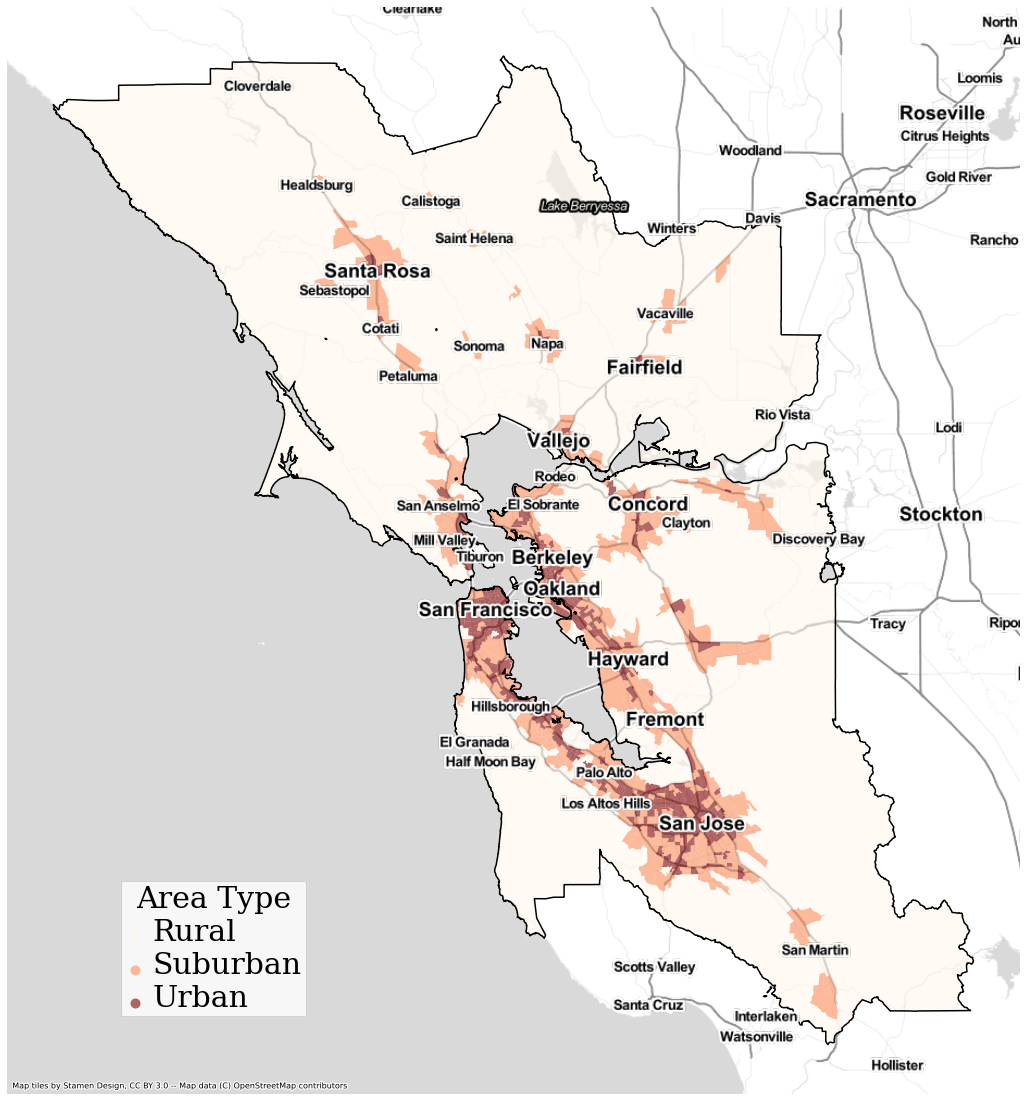

In [119]:
# Densitiy Bins
bins = [0, 6, 30, np.inf]
labels = ['Rural','Suburban', 'Urban']
taz['bin'] = pd.cut(taz['density'], bins=bins, labels=labels)

# Bay Area Boundary
bay_area_boundary = taz.dissolve().geometry.boundary

# Plot
ax = taz.plot(figsize = (20,20), column = 'bin', legend = True, cmap='OrRd', alpha = 0.6, categorical = True)
bay_area_boundary.plot(ax = ax, color = 'black')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels)

# Customize the legend properties
legend = ax.get_legend()
legend.set_title('Area Type', prop={'family': 'serif'})
legend.get_title().set_fontsize(30)
legend.set_bbox_to_anchor((0.3, 0.2))


# legend.align = 'left'
for text in legend.get_texts():
    text.set_fontsize(30)
    text.set_fontfamily('serif')
    text.set_ha('left')
    
ax.set_axis_off()